## Data Loading & Preprocessing

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as scikit_learn

In [206]:
csv_path = "/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/ML/Test/Copy Dataset/Diabetes_Final_Data_V2 copy.csv"
df = pd.read_csv(csv_path)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [207]:
df.shape

(5437, 15)

In [208]:
df.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

In [209]:
df[df.duplicated()]

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic


<Axes: xlabel='age'>

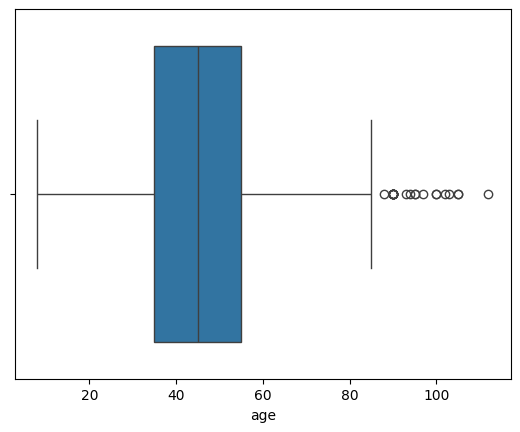

In [210]:
sns.boxplot(x=df['age'])

In [211]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Filter the outlier values in the 'age' column
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]

# Display the outlier values
outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
360,90,Female,60,222,111,7.58,1.60,58.2,22.73,0,1,0,0,0,No
404,90,Male,68,180,76,8.44,1.65,70.3,25.79,0,1,0,1,0,No
487,97,Male,121,143,88,8.68,1.55,49.4,20.58,0,0,0,0,0,No
633,94,Female,81,187,86,5.12,1.32,24.5,14.04,0,0,0,0,0,No
713,105,Male,78,160,85,9.77,1.63,45.0,17.03,0,0,0,0,0,No
768,90,Male,63,132,59,7.77,1.52,48.0,20.67,0,0,0,0,0,No
887,90,Male,93,179,95,6.40,1.47,25.5,11.75,0,0,0,0,0,No
1250,95,Male,71,148,75,7.20,1.60,65.8,25.70,0,0,0,0,0,No
1769,105,Female,90,153,77,8.64,1.47,36.0,16.59,0,0,0,0,0,No
1862,93,Male,79,110,67,8.32,1.65,58.0,21.28,0,0,0,0,0,No


In [11]:
# Filter the non-outlier values in the 'age' column
non_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Display the non-outlier values
non_outliers

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,74,Male,83,164,89,6.47,1.60,64.0,24.99,0,1,0,1,0,No
5433,75,Male,67,141,104,8.31,1.65,62.0,22.75,0,0,0,0,0,Yes
5434,40,Female,67,134,114,7.61,1.50,69.0,30.72,0,1,0,0,1,No
5435,36,Female,62,139,80,4.90,1.52,41.5,17.87,0,0,0,0,0,No


In [12]:
non_outliers.shape

(5414, 15)

<Axes: xlabel='age'>

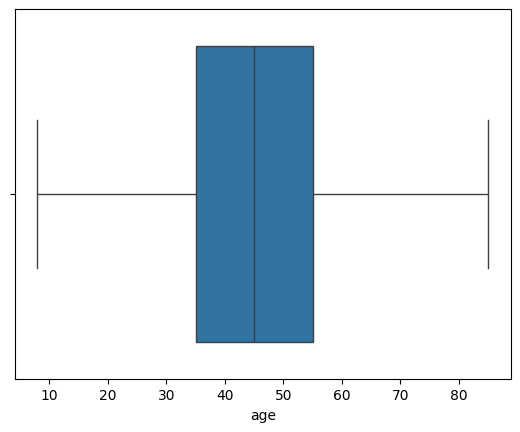

In [13]:
df = non_outliers
sns.boxplot(x=df['age'])

In [212]:
df['diabetic'].value_counts()

diabetic
No     5093
Yes     344
Name: count, dtype: int64

In [213]:
df['gender'].value_counts()

gender
Female    3859
Male      1578
Name: count, dtype: int64

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   object 
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [215]:
# Ensure you're modifying the original dataframe
df = df.copy()

df['gender'] = df['gender'].astype('category')
df['diabetic'] = df['diabetic'].astype('category')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   age                     5437 non-null   int64   
 1   gender                  5437 non-null   category
 2   pulse_rate              5437 non-null   int64   
 3   systolic_bp             5437 non-null   int64   
 4   diastolic_bp            5437 non-null   int64   
 5   glucose                 5437 non-null   float64 
 6   height                  5437 non-null   float64 
 7   weight                  5437 non-null   float64 
 8   bmi                     5437 non-null   float64 
 9   family_diabetes         5437 non-null   int64   
 10  hypertensive            5437 non-null   int64   
 11  family_hypertension     5437 non-null   int64   
 12  cardiovascular_disease  5437 non-null   int64   
 13  stroke                  5437 non-null   int64   
 14  diabetic                

In [217]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['diabetic'] = le.fit_transform(df['diabetic'])

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5437 entries, 0 to 5436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5437 non-null   int64  
 1   gender                  5437 non-null   int64  
 2   pulse_rate              5437 non-null   int64  
 3   systolic_bp             5437 non-null   int64  
 4   diastolic_bp            5437 non-null   int64  
 5   glucose                 5437 non-null   float64
 6   height                  5437 non-null   float64
 7   weight                  5437 non-null   float64
 8   bmi                     5437 non-null   float64
 9   family_diabetes         5437 non-null   int64  
 10  hypertensive            5437 non-null   int64  
 11  family_hypertension     5437 non-null   int64  
 12  cardiovascular_disease  5437 non-null   int64  
 13  stroke                  5437 non-null   int64  
 14  diabetic                5437 non-null   

In [219]:
df.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0


In [220]:
from sklearn.utils import shuffle
df = shuffle(df)
df

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
4937,35,0,76,157,90,5.00,1.24,69.0,44.88,0,0,0,0,0,0
2677,56,0,90,112,82,8.50,1.57,61.0,24.60,0,0,0,0,0,0
617,65,1,64,153,63,6.47,1.57,52.0,20.97,0,0,0,0,0,0
418,35,0,83,100,66,5.92,1.50,45.0,20.04,0,0,0,0,0,0
2957,35,0,64,169,93,10.28,1.50,61.0,27.16,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,50,0,72,127,80,5.88,1.52,57.3,24.67,0,0,0,0,0,0
1642,55,1,78,129,78,8.39,1.63,41.9,15.86,0,0,0,0,0,0
1285,50,0,91,138,96,9.46,1.52,58.0,24.97,0,0,0,0,0,0
1011,64,1,75,130,77,15.95,1.57,53.1,21.41,0,0,0,0,0,0


In [221]:
df = df.reset_index()
df

,index,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,4937,35,0,76,157,90,5.00,1.24,69.0,44.88,0,0,0,0,0,0
1,2677,56,0,90,112,82,8.50,1.57,61.0,24.60,0,0,0,0,0,0
2,617,65,1,64,153,63,6.47,1.57,52.0,20.97,0,0,0,0,0,0
3,418,35,0,83,100,66,5.92,1.50,45.0,20.04,0,0,0,0,0,0
4,2957,35,0,64,169,93,10.28,1.50,61.0,27.16,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,4269,50,0,72,127,80,5.88,1.52,57.3,24.67,0,0,0,0,0,0
5433,1642,55,1,78,129,78,8.39,1.63,41.9,15.86,0,0,0,0,0,0
5434,1285,50,0,91,138,96,9.46,1.52,58.0,24.97,0,0,0,0,0,0
5435,1011,64,1,75,130,77,15.95,1.57,53.1,21.41,0,0,0,0,0,0


In [222]:
x = df.drop('diabetic', axis=1)
y = df['diabetic']

In [223]:
x.columns

Index(['index', 'age', 'gender', 'pulse_rate', 'systolic_bp', 'diastolic_bp',
       'glucose', 'height', 'weight', 'bmi', 'family_diabetes', 'hypertensive',
       'family_hypertension', 'cardiovascular_disease', 'stroke'],
      dtype='object')

In [224]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5432    0
5433    0
5434    0
5435    0
5436    0
Name: diabetic, Length: 5437, dtype: int64

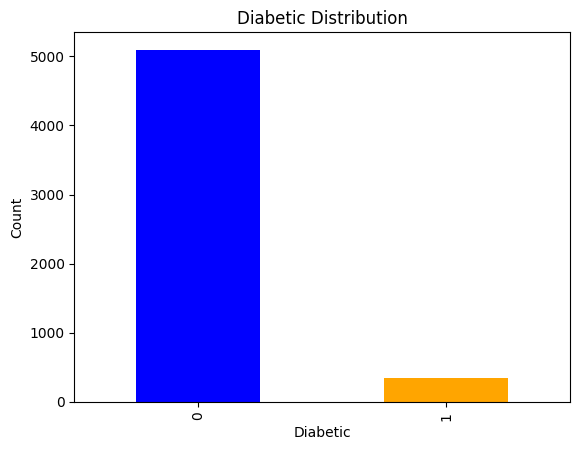

In [225]:
y.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

In [226]:
class_counts = y.value_counts()
class_counts

diabetic
0    5093
1     344
Name: count, dtype: int64

In [227]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    93.672981
1     6.327019
Name: count, dtype: float64

In [228]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)


print("x_train data size", len(x_train))
print("y_train data size", len(y_train))

print("x_test data size", len(x_test))
print("y_test data size", len(y_test))

x_train data size 4349
y_train data size 4349
x_test data size 1088
y_test data size 1088


In [229]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Convert y_train to integer if needed
y_train = y_train.astype(int)

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.3, random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

Class distribution after SMOTE: Counter({0: 4078, 1: 1223})


In [230]:
class_counts = y_train_resampled.value_counts()
class_counts

diabetic
0    4078
1    1223
Name: count, dtype: int64

In [231]:
# Calculate total count
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total) * 100
percentages

diabetic
0    76.928881
1    23.071119
Name: count, dtype: float64

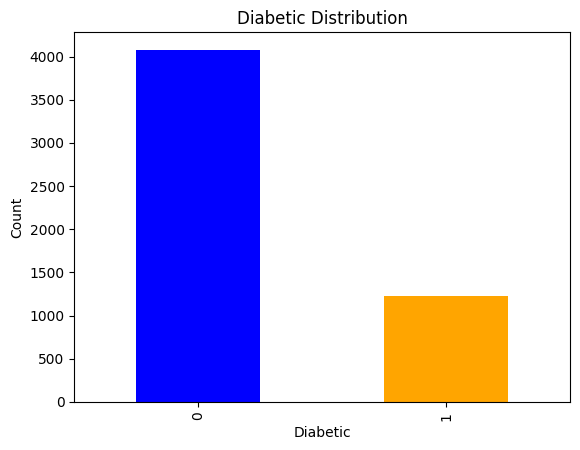

In [232]:
y_train_resampled.value_counts().plot(kind = 'bar', color = ['blue', 'orange']) 
plt.title('Diabetic Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Count')
plt.show()

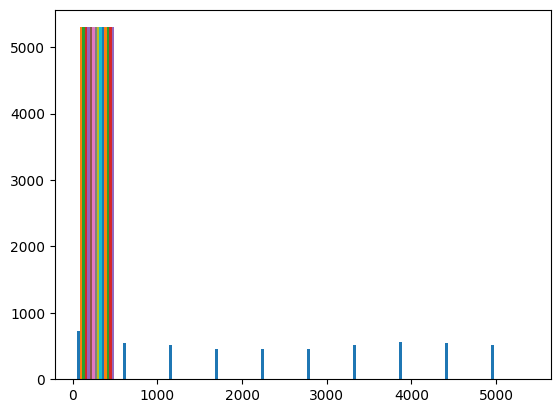

In [233]:
plt.hist(x_train_resampled)
plt.show()

In [234]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()  
std_scaled_x = std_scaler.fit_transform(x_train_resampled)  

std_scaled_x

array([[ 1.24084668,  1.70703163,  1.68232051, ..., -0.18748169,
        -0.09953215, -0.05672089],
       [-0.28565785, -1.19142278, -0.59441705, ..., -0.18748169,
        -0.09953215, -0.05672089],
       [-0.43217776, -0.10450238, -0.59441705, ..., -0.18748169,
        -0.09953215, -0.05672089],
       ...,
       [ 0.76389065,  1.05487939, -0.59441705, ..., -0.18748169,
        -0.09953215, -0.05672089],
       [ 0.67131949, -0.39434782, -0.59441705, ..., -0.18748169,
        -0.09953215, -0.05672089],
       [-1.14761182, -0.39434782, -0.59441705, ..., -0.18748169,
        -0.09953215, -0.05672089]], shape=(5301, 15))

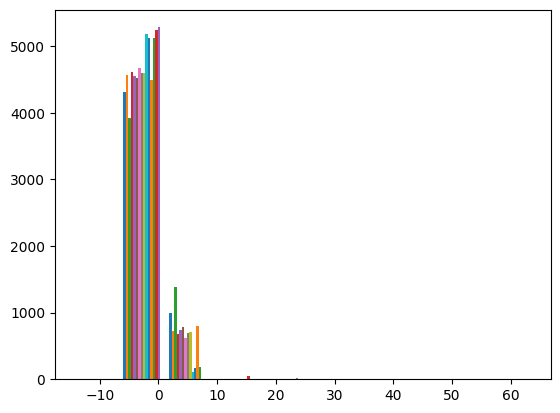

In [235]:
plt.hist(std_scaled_x)
plt.show()

In [237]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()  # Corrected the typo here
m_scaled_x = m_scaler.fit_transform(x_train_resampled)  # Assuming 'x' is your input data

m_scaled_x

array([[0.85908756, 0.59615385, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.40103017, 0.21153846, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.35706402, 0.35576923, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.71596762, 0.50961538, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68818985, 0.31730769, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14238411, 0.31730769, 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(5301, 15))

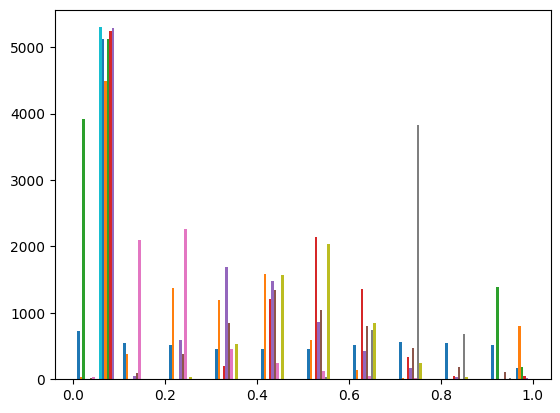

In [238]:
plt.hist(m_scaled_x)
plt.show()

In [239]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()  
robust_scaled_x = robust_scaler.fit_transform(x_train_resampled)  

robust_scaled_x

array([[ 0.69122687,  1.19047619,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.16209733, -0.71428571,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.24400274,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.42460589,  0.76190476,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.37285812, -0.19047619,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.6439342 , -0.19047619,  0.        , ...,  0.        ,
         0.        ,  0.        ]], shape=(5301, 15))

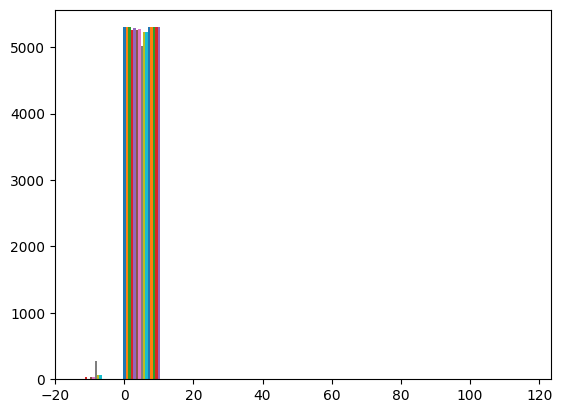

In [240]:
plt.hist(robust_scaled_x)
plt.show()

In [241]:
from sklearn import tree

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(std_scaled_x, y_train_resampled)

DecisionTreeClassifier()

In [242]:
dt_pred = dt_clf.predict(x_test)
dt_pred 

/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 1, 0, 0], shape=(1088,))

In [243]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

cm = confusion_matrix(y_test, dt_pred)
cm

array([[930,  85],
       [ 39,  34]])

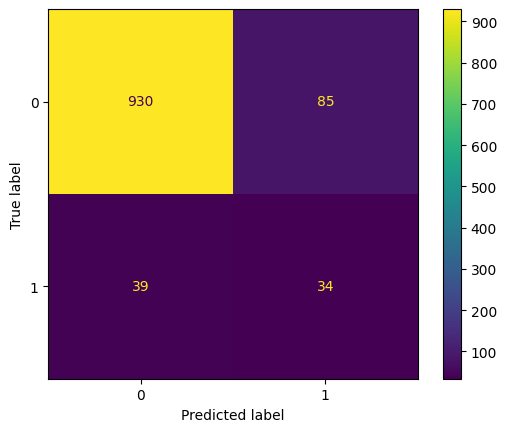

In [244]:
from sklearn.metrics import ConfusionMatrixDisplay

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

In [245]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.89
Precision: 0.29
F1: 0.35
Recall: 0.47


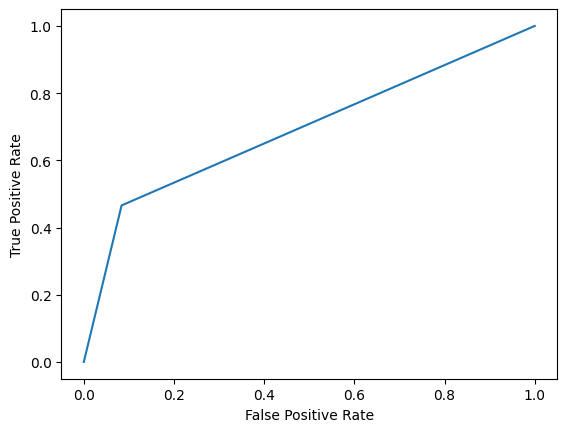

In [246]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [247]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.69


# Hyperparameter Tuning

In [1]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search for the best hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Use GridSearchCV to search the parameter grid
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model with the training data
grid_search.fit(std_scaled_x, y_train_resampled)

NameError: name 'dt_clf' is not defined

In [249]:
best_dt_clf = grid_search.best_estimator_
dt_pred = best_dt_clf.predict(x_test)

/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [250]:
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.89
Precision: 0.29
F1: 0.35
Recall: 0.47


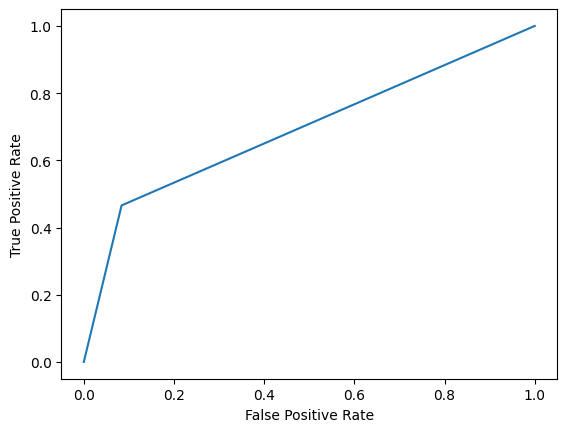

In [251]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, dt_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [252]:
from sklearn.metrics import auc

auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.69


In [253]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(std_scaled_x, y_train_resampled)

RandomForestClassifier()

In [255]:
rf_pred = rf_clf.predict(x_test)
rf_pred

/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/my_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], shape=(1088,))

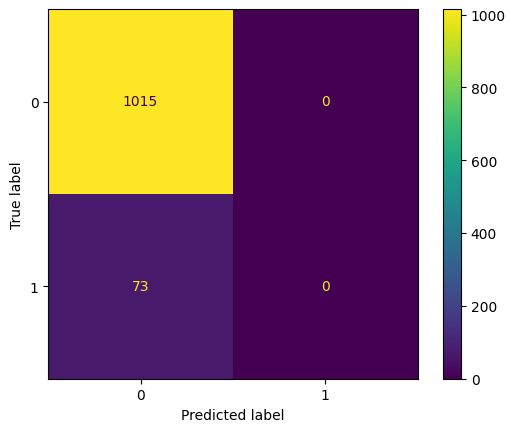

In [256]:
cm = confusion_matrix(y_test, rf_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

In [257]:
accuracy = accuracy_score(y_test, rf_pred)
precision = precision_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.00
F1: 0.00
Recall: 0.00


/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/my_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


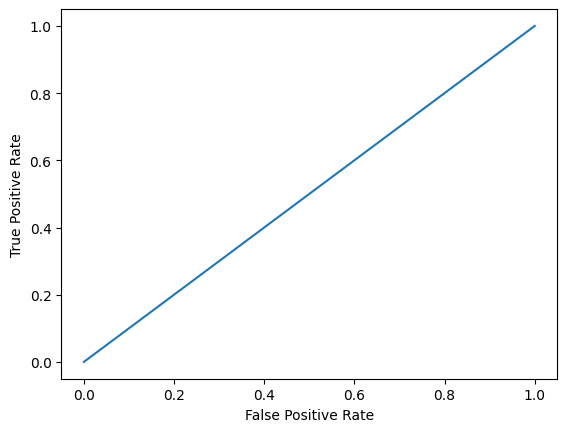

In [258]:
fpr, tpr, _ = roc_curve(y_test, rf_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [259]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.50


In [260]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(std_scaled_x, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [261]:
xgb_pred = xgb_clf.predict(x_test)
xgb_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1088,))

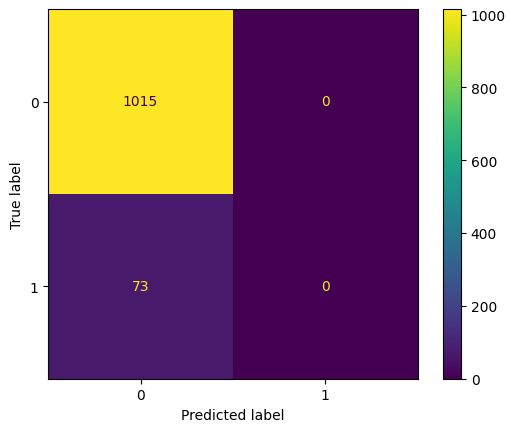

In [262]:
cm = confusion_matrix(y_test, xgb_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

In [263]:
accuracy = accuracy_score(y_test, xgb_pred)
precision = precision_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
recall = recall_score(y_test, xgb_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.00
F1: 0.00
Recall: 0.00


/Users/saifmohammed/Desktop/CSE299-Junior-Design-Project/my_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


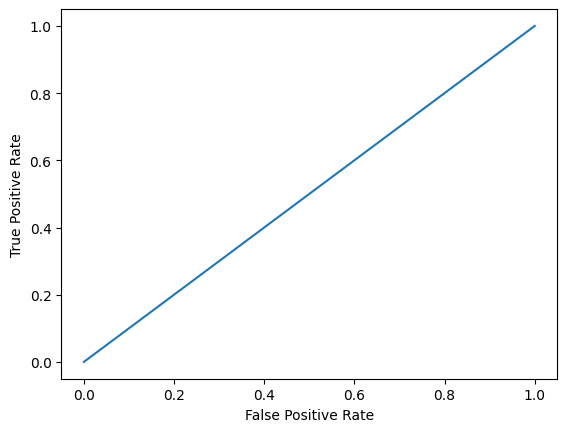

In [264]:
fpr, tpr, _ = roc_curve(y_test, xgb_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [265]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.50


In [266]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [267]:
knn_pred = knn.predict(x_test)
knn_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1088,))

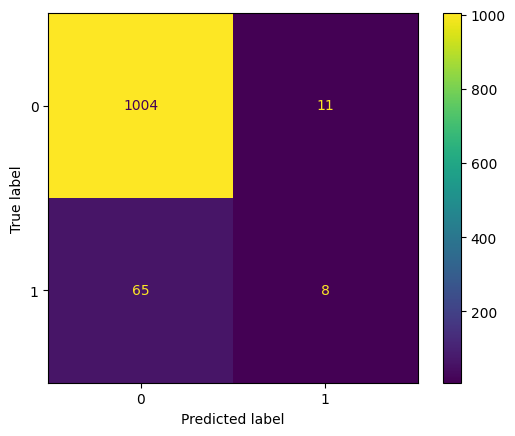

In [268]:
cm = confusion_matrix(y_test, knn_pred)

display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()

plt.show()

In [269]:
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1: {f1:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.93
Precision: 0.42
F1: 0.17
Recall: 0.11


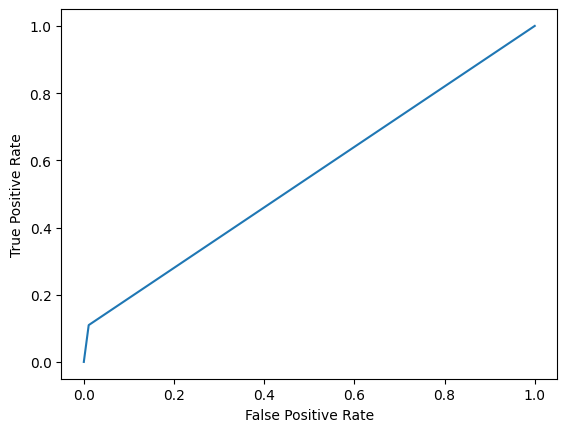

In [270]:
fpr, tpr, _ = roc_curve(y_test, knn_pred)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [200]:
auc_score = auc(fpr, tpr)
print(f'Area under the curve (AUC)= {auc_score:.2f}')

Area under the curve (AUC)= 0.55


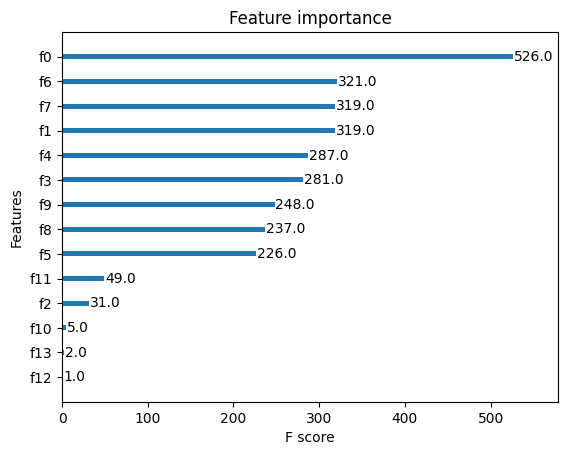

In [273]:
from xgboost import plot_importance
from matplotlib import pyplot

ax = plot_importance(xgb_clf)
# ax.set_yticklabels(feature_names)
pyplot.grid(False)
pyplot.show()

NameError: name 'feature_names' is not defined

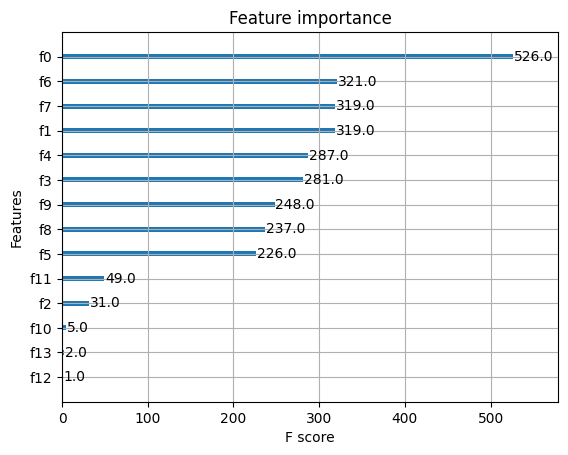

In [274]:
ax = plot_importance(xgb_clf)
ax.set_yticklabels(feature_names)
pyplot.grid(False)
pyplot.show()